# Outputs Visualisation and Validation

In previous workshops, you have learnt how to train different machine learning models and also use these trained models to make predictions. However, we have not focused on how to evaluate the performance of the model or visualise the outputs from the model. As such, we will now focus on how we can use different visualisation tools to help evaluate the performance of the model. In this notebook, you will learn how to utilise confusion matrix and heatmaps to evaluate your model. These tools will help to identify the accuracy of the model.

We first need to understand the concept of accuracy. How accurate does a model have to be before it is a good model? The answer depends on the use case of the model. For example, the model has to be very close to 100% accuracy if it involves huge financial amounts or illnesses identification. This is because these are important issues that may affect many people if the model were to be wrong by just fractions of a percent. On the other hand, if you were predicting movie recommendations or video recommendations it may be ok if it were less accurate as the implications of a wrong prediction are not as serious as the previously mentioned scenarios. Furthermore, it is also important to understand that it is almost impossible to obtain 100% accuracy as in order to do so, you will need to be able to collect every single data that is relevant to the problem. As such, you will need to balance the accuracy of the model with the amount of data that you have and also the use case. However, this does not mean that it is ok to stop after obtaining a low accuracy. You still need to try and see if you can make it better. Only when you have tried many ways and are unable to improve the accuracy then can you decide if the accuracy is good enough for the use case.

We will now see how we can use the visualisation tools for the machine learning techniques that you have tried in previous notebooks.

In [6]:
# Import your libraries here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 1. K-Nearest Neighbours

We will again use the K-Nearest Neighbours algorithm on the Iris Flower dataset. Import the dataset as a dataframe df and label encode the dataset. Label encoding is the conversion of categories into numerical groups. Write the code to label encode the dataset as a function (label_encode) instead. This will allow the label encoding code to be re-used if necessary in the notebook. Read this [article](https://www.codementor.io/kaushikpal/user-defined-functions-in-python-8s7wyc8k2) to find out how to write a user defined function. When we code, it is always useful to write functions if we think that the functions would be used more than once in the script. Expand the code below to import and label encode the dataset.

In [7]:
def preprocess(path = str, cols = list):
    df = pd.read_csv(path, names=cols)
    # remove na values
    df.dropna(inplace=False)
    # label encoding
    mappings = {
        'Iris-setosa':0,
        'Iris-versicolor':1, 
        'Iris-virginica':2
    }
    # apply mapping to class column
    df['class'] = df['class'].map(mappings)
    
    return df

In [8]:
path = "data/iris.data"
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df = preprocess(path, cols)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
x_values = df.drop(columns=['class']).copy()
y_values = df['class'].copy()

Now, split the data into train and test sets and also standardise the data. Keep 30% of the data in the test set.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=123)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [44]:
ss = StandardScaler()
x_train_scale = ss.fit_transform(x_train)
x_test_scale = ss.transform(x_test)

print(x_train_scale.shape)
print(x_test_scale.shape)

(105, 4)
(45, 4)


Train a K-Nearest Neighbours algorithm with the dataset. Remember to use the optimal number of neighbours (6) found in the earlier notebook.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
KNN = KNeighborsClassifier(n_neighbors=6)
# Training or fitting the model with the data
KNN.fit(x_train_scale,y_train)
KNN.score(x_test_scale, y_test)

0.8888888888888888

In order to evaluate the performance of the model, we have to first predict the flower type or class based on the test set. Use the .predict on KNN to predict the flower classes based on the test set. Store the predictions as y_predict.

In [49]:
y_pred = KNN.predict(x_test_scale)

We will use a tool known as a confusion matrix to help us to evaluate the model outputs. Read this [article](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) to find out more about the confusion matrix. What does a true positive refer to? What does a false negative refer to?

True Positives (TP): The number of samples that are correctly classified as positive.

False Positives (FP): The number of samples that are incorrectly classified as positive.

True Negatives (TN): The number of samples that are correctly classified as negative.

False Negatives (FN): The number of samples that are incorrectly classified as negative.

The confusion matrix discussed above is mainly for a 2 class classification problem. In the case of the Iris dataset, it is a multi-class problem as there are more than 2 different classes. In fact, there are 3 different classes or flower types. Thus, the confusion matrix for a multi-class scenario is an extension of the 2 class confusion matrix. As such, a multi-class confusion matrix may help identify which classes were wrongly classified by the model. Let us try to obtain the confusion matrix. Try the code below to import the confusion matrix function.

In [50]:
from sklearn.metrics import confusion_matrix  

Pass in the predicted values and the actual y values into the confusion matrix function. Try out the code below.

In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0]
 [ 0  9  1]
 [ 0  4 13]]


If the model is 100% accurate, there should only be non-zero numbers in the diagonal and zeroes everywhere else in the matrix. This is because the diagonals are where the predictions exactly match the actual data. From the above, we can see that the model is quite accurate and only 1 data point was wrongly classified by the model. Based on the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for the confusion_matrix function, are you able to find out which point was misclassified? What was the data point's original class and what was the data point's predicted class? <font color=blue>Hint: The rows represent the actual classes whereas the columns represent the predicted classes. </font>

In [54]:
# 4 and  1
# if 100% accurate the diagonal line will be 18, 13, 14

We can also present the confusion matrix in an easy to understand heatmap. We can use the library seaborn to help us. Make sure seaborn is installed in your virtual environment. After doing so, run the code below to import seaborn as sns.

In [55]:
import seaborn as sns

Try the code below to see the heatmap.

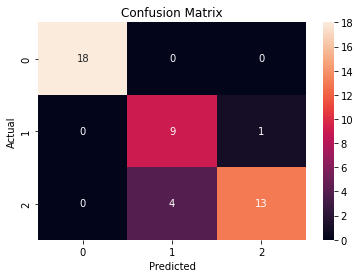

In [58]:
# I write my own code 
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## 2. Decision Tree

We can now apply the same methods to the decision tree. First, train a decision tree on the same dataset using max_depth of 2 and min_samples_split of 6. Do you remember what max_depth and min_samples_split refer to? You can refer to the previous notebook (Model_Outputs) for more information on max_depth and min_Samples_split.

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier(max_depth=2, min_samples_split=6)
# Training or fitting the model with the data
dt.fit(x_train_scale,y_train)
dt.score(x_test_scale, y_test)

0.9555555555555556

Predict the classes using the x_test_scale values.

In [61]:
y_pred_dt = dt.predict(x_test_scale)

Obtain and print the confusion matrix.

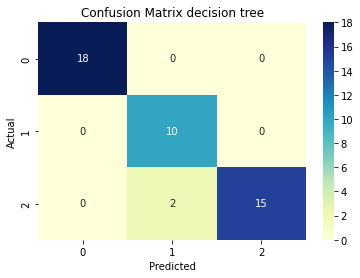

In [66]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# I write my own code 
sns.heatmap(cm_dt, annot=True, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix decision tree')
plt.show()

Are there any wrong classification of data? If so, how many points were wrongly classified? What were the actual and predicted classses of the wrongly classified points?

In [68]:
# 2 class 1 predicted wrongly as class 2
# Actual for class 1 is 12

By comparing the confusion matrices, which do you think is a better model for the problem? Why is it a better model? Discuss with your friends and list your answer below.

In [69]:
# decision tree, based on the confusion matrix it classified better than KNN

Additionally, when accuracy is similar, there are also other metrics to also consider. These include precision, recall and F1 score. Please read this [link](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) and this [link](https://medium.com/@raghaviadoni/evaluation-metrics-i-precision-recall-and-f1-score-3ec25e9fb5d3) for more information on these metrics. How would you use these metrics to help decide on your model choice?

Recall and F1 score are two important performance metrics for binary classification problems, and they can be used to help decide on the best model for a particular problem.

Recall measures the fraction of positive samples that are correctly classified as positive. A high recall value means that the classifier has a low false negative rate, which is desirable if it is important to avoid missing positive cases.

F1 score is the harmonic mean of precision and recall, and it provides a balance between the two. Precision measures the fraction of positive predictions that are actually positive, while recall measures the fraction of positive samples that are correctly classified as positive. A high F1 score means that the classifier has a good balance between precision and recall.

When choosing a model for a binary classification problem, you should consider both recall and F1 score, depending on the specific requirements of the problem. For example, if it is important to avoid missing positive cases, a model with a high recall value might be the best choice. On the other hand, if you want to minimize the number of false positive predictions, a model with a high precision value might be the best choice. The F1 score can be used when you want to find a model that provides a balance between precision and recall.

By comparing the recall and F1 scores of different models, you can choose the best model for your problem based on the specific requirements and constraints of the problem.

After deciding on a model, we can also use the model to identify flower types for newly gathered data. For example, imagine that your friend has measured the sepal_length, sepal_width, petal_length and petal_width of some flowers and saved the data in a file called "iris_predict.data". Your friend wants to find the flower types for these flowers based on the values measured. Would you be able to use your model to help your friend? What are the flower types that your friend measured?
<font color=blue>Hint: Do you remember using the .predict method earlier to obtain the flower types for the test cases? You can also do the same to obtain the flower types for your friend. You will also need to scale your data before obtaining the flower types. </font>

In [70]:
# I would be able to use my model provided my measured the same flower types according the features sepal_length, sepal_width, 
# petal_length, petal_width as this is a supervised learning technique and the model is trained on history.